# Proyecto 4 - Series de Tiempo


## Dataset: Flujo Vehicular por Unidades de Peaje AUSA (2014 a 2019)
 

En el siguiente notebook vamos a estudiar el flujo vehicular de las unidades de peaje AUSA, principalmente nos concentraremos en la estacion Illia. El objetivo es poder predecir la cantidad de pasos diarios que recibe esta estacion, esto nos ayudara a tomar decisiones respecto a la ampliacion de la estacion, rutas, infraestructura, obras por venir, etc. Este mismo estudio se puede llevar a cabo en las otras estaciones que componen el dataset.

Voy a cambiar el enfoque respecto al Proyecto 3 ya que me voy a enfocar solo en el trafico Liviano que pasa por la estacion Illia. El desarrollo va a ser similar ya que utilizaremos modelos para predecir el trafico del año 2019. Ademas vamos a agregar los años 2014, 2015, 2016 y 2020 a nuestro estudio.

La pregunta que queremos responder: Como evoluciona el trafico de la estacion Illia a lo largo del año y los años?. Nos enfocaremos en predecir el trafico para el año 2019 en continuidad con lo que veniamos haciendo en el 3er proyecto para luego pasar al trafico en el año 2020. Por ultimo utilizaremos prophet para hacer una prediccion muy rudimentaria del trafico en 2021. Para finalizar respondiendo a la pregunta.

# Armado del dataset

#### Empiezo cargando los dataset y estudiando un poco sus distintas features y valores unicos que las componen.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Estoy utilizando google colab asi que importo los datos desde google drive.

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link= 'https://drive.google.com/file/id=1zeyHhi_o4V7TofabH_17IsGjKftqB2Zy' # The shareable link



In [4]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1zeyHhi_o4V7TofabH_17IsGjKftqB2Zy


In [5]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('flujo-vehicular-2019.csv')  
data_2019 = pd.read_csv('flujo-vehicular-2019.csv')

In [6]:
link= 'https://drive.google.com/file/id=1o1IOvIPXxpVrgkyACNt3k_UGw0LLSQpo'

In [7]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1o1IOvIPXxpVrgkyACNt3k_UGw0LLSQpo


In [8]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('flujo-vehicular-2018.csv')  
data_2018 = pd.read_csv('flujo-vehicular-2018.csv')

In [9]:
link= 'https://drive.google.com/file/id=1BB-C_nxH8OSjohzhGerQc7Vll6LRK_yH'

In [10]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1BB-C_nxH8OSjohzhGerQc7Vll6LRK_yH


In [11]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('flujo-vehicular-2017.csv')  
data_2017 = pd.read_csv('flujo-vehicular-2017.csv')

In [12]:
link= 'https://drive.google.com/file/id=1OzkaQlPAWKilelnsGp3E5F5VliKJHIWY'

In [13]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1OzkaQlPAWKilelnsGp3E5F5VliKJHIWY


In [14]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('flujo-vehicular-2016.csv')  
data_2016 = pd.read_csv('flujo-vehicular-2016.csv')

In [15]:
link= 'https://drive.google.com/file/id=1z0Y2iP8jr4kAd7Mqjj4XhyXjWe_4dVIo'

In [16]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1z0Y2iP8jr4kAd7Mqjj4XhyXjWe_4dVIo


In [17]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('flujo-vehicular-2015.csv')  
data_2015 = pd.read_csv('flujo-vehicular-2015.csv')

In [18]:
link= 'https://drive.google.com/file/id=1iWgpDLQcgT92f4dB9Oq9MvKnunKWMfAD'

In [19]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1iWgpDLQcgT92f4dB9Oq9MvKnunKWMfAD


In [20]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('flujo-vehicular-2014.csv')  
data_2014 = pd.read_csv('flujo-vehicular-2014.csv')

#### Una vez cargado los datos proseguimos a analizar los datasets cargados, con sus features y valores unicos.

In [21]:
data_2019.info()
data_2019.head()
data_2019.drop(columns=['hora_inicio','sentido'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_fin,dia,estacion,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,1,Martes,Alberti,Liviano,NO COBRADO,22
1,2019,2019-01-01,1,Martes,Alberti,Liviano,TELEPASE,6
2,2019,2019-01-01,1,Martes,Alberti,Liviano,NO COBRADO,53
3,2019,2019-01-01,1,Martes,Alberti,Liviano,TELEPASE,18
4,2019,2019-01-01,1,Martes,Avellaneda,Liviano,EFECTIVO,16
...,...,...,...,...,...,...,...,...
812148,2019,2019-12-31,0,Martes,Salguero,Liviano,NO COBRADO,7
812149,2019,2019-12-31,0,Martes,Salguero,Liviano,TELEPASE,4
812150,2019,2019-12-31,0,Martes,Salguero,Pesado,NO COBRADO,1
812151,2019,2019-12-31,0,Martes,Sarmiento,Liviano,NO COBRADO,7


In [22]:
data_2018.info()
data_2018.head()
data_2018.drop(columns=['hora_inicio','sentido'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_fin,dia,estacion,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,1,Lunes,Alberdi,Liviano,NO COBRADO,29
1,2018,2018-01-01,1,Lunes,Alberdi,Liviano,TELEPASE,9
2,2018,2018-01-01,2,Lunes,Alberdi,Liviano,NO COBRADO,73
3,2018,2018-01-01,2,Lunes,Alberdi,Liviano,TELEPASE,39
4,2018,2018-01-01,3,Lunes,Alberdi,Liviano,NO COBRADO,115
...,...,...,...,...,...,...,...,...
1375903,2018,2018-12-31,22,Lunes,Sarmiento,Liviano,TELEPASE,62
1375904,2018,2018-12-31,22,Lunes,Sarmiento,Pesado,TELEPASE,1
1375905,2018,2018-12-31,23,Lunes,Sarmiento,Liviano,NO COBRADO,3
1375906,2018,2018-12-31,23,Lunes,Sarmiento,Liviano,TELEPASE,13


In [23]:
data_2017.info()
data_2017.head()
data_2017.drop(columns=['hora_inicio','sentido'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_fin,dia,estacion,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,1,Domingo,Alberdi,Liviano,NO COBRADO,25
1,2017,2017-01-01,1,Domingo,Alberdi,Liviano,TELEPASE,7
2,2017,2017-01-01,2,Domingo,Alberdi,Liviano,NO COBRADO,5
3,2017,2017-01-01,2,Domingo,Alberdi,Liviano,EFECTIVO,2
4,2017,2017-01-01,2,Domingo,Alberdi,Liviano,EFECTIVO,94
...,...,...,...,...,...,...,...,...
1372640,2017,2017-12-31,23,Domingo,Sarmiento,Liviano,NO COBRADO,3
1372641,2017,2017-12-31,23,Domingo,Sarmiento,Liviano,TELEPASE,10
1372642,2017,2017-12-31,23,Domingo,Sarmiento,Pesado,TELEPASE,1
1372643,2017,2017-12-31,0,Domingo,Sarmiento,Liviano,NO COBRADO,1


In [24]:
data_2016.info()
data_2016.head()
data_2016.drop(columns=['hora_inicio','sentido'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379443 entries, 0 to 1379442
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1379443 non-null  int64 
 1   fecha           1379443 non-null  object
 2   hora_inicio     1379443 non-null  int64 
 3   hora_fin        1379443 non-null  int64 
 4   dia             1379443 non-null  object
 5   estacion        1379443 non-null  object
 6   sentido         1379443 non-null  object
 7   tipo_vehiculo   1379443 non-null  object
 8   forma_pago      1379443 non-null  object
 9   cantidad_pasos  1379443 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.2+ MB


,periodo,fecha,hora_fin,dia,estacion,tipo_vehiculo,forma_pago,cantidad_pasos
0,2016,2016-01-01,1,Viernes,Alberdi,Liviano,NO COBRADO,32
1,2016,2016-01-01,1,Viernes,Alberdi,Liviano,AUPASS,9
2,2016,2016-01-01,2,Viernes,Alberdi,Liviano,NO COBRADO,1
3,2016,2016-01-01,2,Viernes,Alberdi,Liviano,EFECTIVO,4
4,2016,2016-01-01,2,Viernes,Alberdi,Liviano,EXENTO,3
...,...,...,...,...,...,...,...,...
1379438,2016,2016-12-31,22,Sábado,Sarmiento,Liviano,AUPASS,77
1379439,2016,2016-12-31,23,Sábado,Sarmiento,Liviano,NO COBRADO,2
1379440,2016,2016-12-31,23,Sábado,Sarmiento,Liviano,AUPASS,6
1379441,2016,2016-12-31,0,Sábado,Sarmiento,Liviano,NO COBRADO,1


In [25]:
data_2015.info()
data_2015.head()
data_2015.rename(columns = {'hora':'hora_fin'}, inplace = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017958 entries, 0 to 1017957
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1017958 non-null  int64 
 1   fecha           1017958 non-null  object
 2   hora            1017958 non-null  int64 
 3   dia             1017958 non-null  object
 4   estacion        1017958 non-null  object
 5   tipo_vehiculo   1017958 non-null  object
 6   forma_pago      1017958 non-null  object
 7   cantidad_pasos  1017958 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 62.1+ MB


In [26]:
data_2014.info()
data_2014.head()
data_2014.rename(columns = {'hora':'hora_fin'}, inplace = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809376 entries, 0 to 809375
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   periodo         809374 non-null  float64
 1   fecha           809374 non-null  object 
 2   hora            809374 non-null  float64
 3   dia             809374 non-null  object 
 4   estacion        809374 non-null  object 
 5   tipo_vehiculo   809374 non-null  object 
 6   forma_pago      809374 non-null  object 
 7   cantidad_pasos  809375 non-null  float64
dtypes: float64(3), object(5)
memory usage: 49.4+ MB


In [27]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())
print(data_2016['estacion'].unique())
print(data_2015['estacion'].unique())
print(data_2014['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Liniers' 'Illia' 'Retiro' 'Sarmiento'
 'Dellepiane Centro' 'Salguero']
['Alberdi' 'Avellaneda' 'Dellepiane Liniers' 'Illia' 'Retiro' 'Sarmiento'
 nan]


In [28]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())
print(data_2016['tipo_vehiculo'].unique())
print(data_2015['tipo_vehiculo'].unique())
print(data_2014['tipo_vehiculo'].unique())


['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado' nan]


In [29]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())
print(data_2016['forma_pago'].unique())
print(data_2015['forma_pago'].unique())
print(data_2014['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']
['NO COBRADO' 'AUPASS' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']
['NO COBRADO' 'EFECTIVO' 'EXENTO' 'AUPASS' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']
['NO COBRADO' 'EFECTIVO' 'AUPASS' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO' nan]


In [30]:
print(data_2019['dia'].unique())
print(data_2018['dia'].unique())
print(data_2017['dia'].unique())
print(data_2016['dia'].unique())
print(data_2015['dia'].unique())
print(data_2014['dia'].unique())

['Martes' 'Viernes' 'Lunes' 'Miércoles' 'Sábado' 'Jueves' 'Domingo']
['Lunes' 'Martes' 'Miércoles' 'Jueves' 'Viernes' 'Sábado' 'Domingo']
['Domingo' 'Lunes' 'Martes' 'Miércoles' 'Jueves' 'Viernes' 'Sábado']
['Viernes' 'Sábado' 'Domingo' 'Lunes' 'Martes' 'Miércoles' 'Jueves']
['Jueves' 'Viernes' 'Sabado' 'Domingo' 'Lunes' 'Martes' 'Miercoles']
['Miercoles' 'Jueves' 'Viernes' 'Sabado' 'Domingo' 'Lunes' 'Martes' nan]


Proseguimos como el armado del dataset que vamos a utilizar.

In [31]:
dataset = pd.concat([data_2019, data_2018, data_2017,data_2016,data_2015,data_2014])


In [32]:
# Reemplazamos para contar con los mismos valores categoricos
dataset.replace({"Miércoles": 'Miercoles', "Sábado": 'Sabado','T. DISCAPACIDAD':'TARJETA DISCAPACIDAD','MONEDERO':'EFECTIVO'},inplace=True)

In [33]:
# Utilizaremos solo la estacion Illia
mask = dataset.estacion=='Illia'
dataset = dataset[mask]
dataset.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
19,2019.0,2019-01-01,0.0,1.0,Martes,Illia,Centro,Liviano,NO COBRADO,146.0
20,2019.0,2019-01-01,0.0,1.0,Martes,Illia,Centro,Liviano,TELEPASE,59.0
21,2019.0,2019-01-01,0.0,1.0,Martes,Illia,Centro,Pesado,TELEPASE,1.0
22,2019.0,2019-01-01,0.0,1.0,Martes,Illia,Provincia,Liviano,NO COBRADO,147.0
23,2019.0,2019-01-01,0.0,1.0,Martes,Illia,Provincia,Liviano,TELEPASE,106.0


#### A diferencia del Proyecto 3 donde usamos los dos tipos de vehiculo, en este utilizaremos solo el trafico Liviano. Esto se debe a la gran diferencia de pasos de vehiculos que hay entre los dos, el trafico va a estar dado por la cantidad de vehiculos livianos que pasen por el peaje Illia.

In [34]:
mask = dataset.tipo_vehiculo=='Liviano'
dataset = dataset[mask]
dataset.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
19,2019.0,2019-01-01,0.0,1.0,Martes,Illia,Centro,Liviano,NO COBRADO,146.0
20,2019.0,2019-01-01,0.0,1.0,Martes,Illia,Centro,Liviano,TELEPASE,59.0
22,2019.0,2019-01-01,0.0,1.0,Martes,Illia,Provincia,Liviano,NO COBRADO,147.0
23,2019.0,2019-01-01,0.0,1.0,Martes,Illia,Provincia,Liviano,TELEPASE,106.0
80,2019.0,2019-01-01,1.0,2.0,Martes,Illia,Centro,Liviano,EFECTIVO,537.0


In [35]:
dataset.drop(columns = ['periodo','hora_inicio', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
19,2019-01-01,1.0,Martes,Centro,Liviano,NO COBRADO,146.0
20,2019-01-01,1.0,Martes,Centro,Liviano,TELEPASE,59.0
22,2019-01-01,1.0,Martes,Provincia,Liviano,NO COBRADO,147.0
23,2019-01-01,1.0,Martes,Provincia,Liviano,TELEPASE,106.0
80,2019-01-01,2.0,Martes,Centro,Liviano,EFECTIVO,537.0


In [36]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin','sentido'], inplace = True)

dataset.head()

,dia,tipo_vehiculo,forma_pago,cantidad_pasos,fecha2
19,Martes,Liviano,NO COBRADO,146.0,2019-01-01 01:00:00
20,Martes,Liviano,TELEPASE,59.0,2019-01-01 01:00:00
22,Martes,Liviano,NO COBRADO,147.0,2019-01-01 01:00:00
23,Martes,Liviano,TELEPASE,106.0,2019-01-01 01:00:00
80,Martes,Liviano,EFECTIVO,537.0,2019-01-01 02:00:00


In [37]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
19,Martes,Liviano,NO COBRADO,146.0,2019-01-01 01:00:00
20,Martes,Liviano,TELEPASE,59.0,2019-01-01 01:00:00
22,Martes,Liviano,NO COBRADO,147.0,2019-01-01 01:00:00
23,Martes,Liviano,TELEPASE,106.0,2019-01-01 01:00:00
80,Martes,Liviano,EFECTIVO,537.0,2019-01-01 02:00:00


In [38]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,Miercoles,Liviano,TARJETA DISCAPACIDAD,1.0,2014-01-01 00:00:00
1,Miercoles,Liviano,NO COBRADO,27.0,2014-01-01 00:00:00
2,Miercoles,Liviano,EFECTIVO,1.0,2014-01-01 00:00:00
3,Miercoles,Liviano,AUPASS,21.0,2014-01-01 00:00:00
4,Miercoles,Liviano,EFECTIVO,39.0,2014-01-01 00:00:00
...,...,...,...,...,...
697635,Martes,Liviano,TELEPASE,122.0,2019-12-31 23:00:00
697636,Martes,Liviano,NO COBRADO,3.0,2019-12-31 23:00:00
697637,Martes,Liviano,INFRACCION,4.0,2019-12-31 23:00:00
697638,Martes,Liviano,EXENTO,1.0,2019-12-31 23:00:00


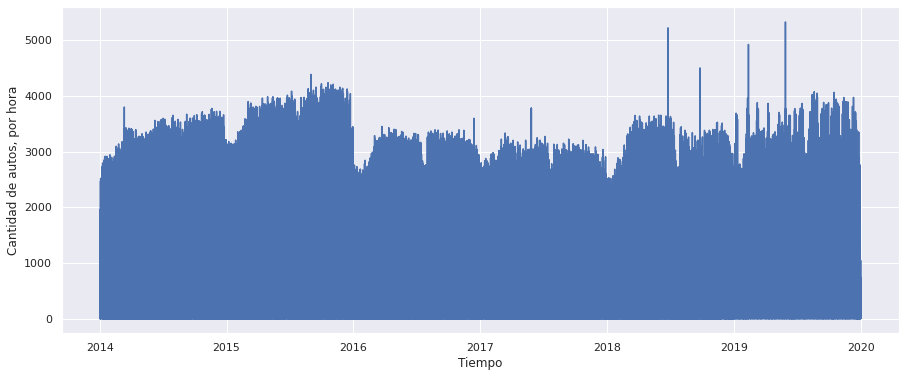

In [39]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
#plt.xlim(datetime.date(2017,1,1), datetime.date(2017,1,1))
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [40]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario2 = dataset.resample('D', on = 'fecha').sum()
print(diario2.shape)
diario2.head()

(2191, 1)


,cantidad_pasos
fecha,
2014-01-01,10358.0
2014-01-02,27353.0
2014-01-03,56631.0
2014-01-04,31.0
2014-01-05,21.0


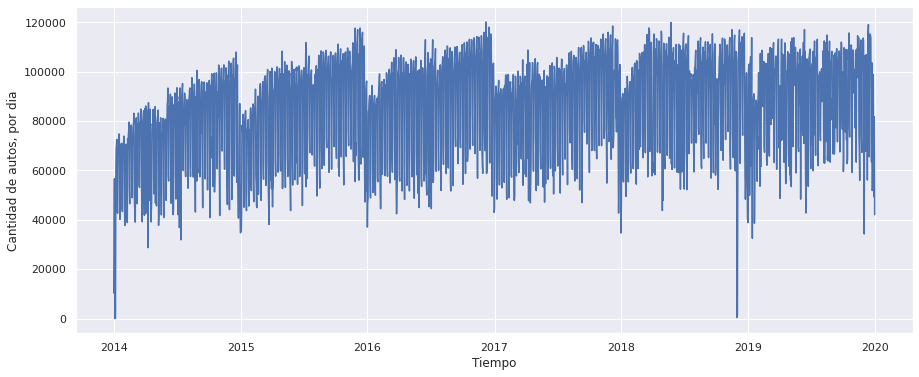

In [41]:
plt.figure(figsize = (15,6))
plt.plot(diario2.index, diario2.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

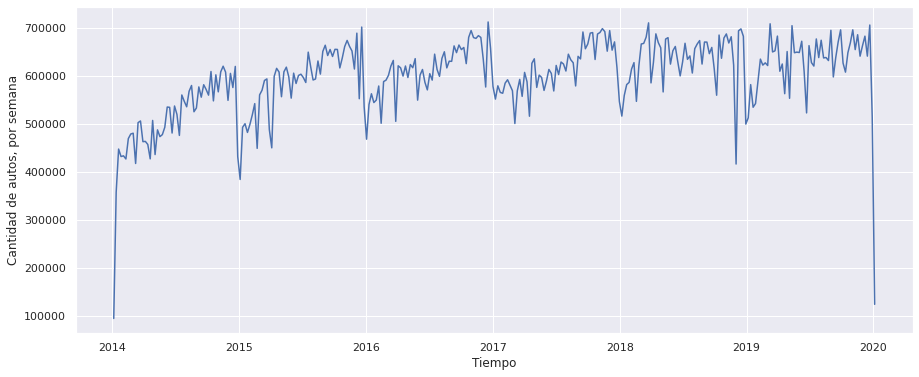

In [42]:
#Resampleamos nuestros datos para agrupar por semana.
semanal = dataset.resample('W', on = 'fecha').sum()
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.show()

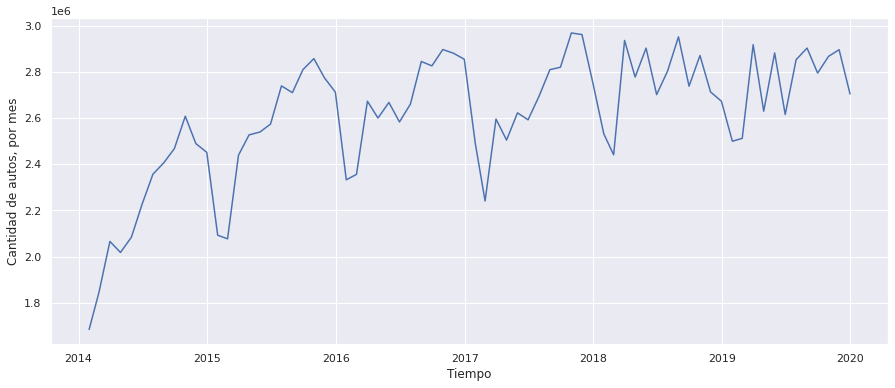

In [43]:
#Resampleamos nuestros datos para agrupar por semana.
mensual = dataset.resample('M', on = 'fecha').sum()
plt.figure(figsize = (15,6))
plt.plot(mensual.index, mensual.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.show()

## Manejo de outliers

#### Realizamos la limpieza de los outliers con el rango intercuantilico y el primer y tercer cuartil.

In [44]:
dataset.shape

(697640, 5)

In [45]:
df=dataset

In [46]:

Q1 = df.cantidad_pasos.quantile(0.25)
Q3 = df.cantidad_pasos.quantile(0.75)
IQR = Q3 - Q1;
df=df[~((df.cantidad_pasos < (Q1 - 1.5 * IQR)) |(df.cantidad_pasos > (Q3 + 1.5 * IQR)))]
df.shape

(568923, 5)

In [47]:
#lmin=Q1 - 1.5 * IQR
#lmax=Q3 + 1.5 * IQR
#df.cantidad_pasos[df.cantidad_pasos < lmin] = np.nan
#df.cantidad_pasos[df.cantidad_pasos > lmax] = np.nan

In [48]:
# Chequeamos que no queden nulos en el camino
print(df.isna().sum())
df = df.interpolate()
print(df.isna().sum())

dia               0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
fecha             0
dtype: int64
dia               0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
fecha             0
dtype: int64


## Encodeado

#### Sumamos a nuestro dataset los dias y el tipo de vehiculo para tener una mayor disponibilidad de datos para los modelos

In [49]:
dias=df.dia.unique()
dias.tolist()

['Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo', 'Lunes', 'Martes']

In [50]:
tipo=df.tipo_vehiculo.unique()
tipo.tolist()

['Liviano']

In [51]:
# Traemos los datos agrupados por dia
diario = df.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(2191, 1)


,cantidad_pasos
fecha,
2014-01-01,6330.0
2014-01-02,5962.0
2014-01-03,6616.0
2014-01-04,31.0
2014-01-05,21.0


In [52]:
for i in dias:
    feat=df[df.dia==i]
    feat.reset_index(drop=True,inplace=True)
    variable=feat.resample('D', on = 'fecha').sum()
    diario[i]=variable.cantidad_pasos

In [53]:
diario.head()

,cantidad_pasos,Miercoles,Jueves,Viernes,Sabado,Domingo,Lunes,Martes
fecha,,,,,,,,
2014-01-01,6330.0,6330.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,5962.0,0.0,5962.0,NaN,NaN,NaN,NaN,NaN
2014-01-03,6616.0,0.0,0.0,6616.0,NaN,NaN,NaN,NaN
2014-01-04,31.0,0.0,0.0,0.0,31.0,NaN,NaN,NaN
2014-01-05,21.0,0.0,0.0,0.0,0.0,21.0,NaN,NaN


## Manejo de NaN

#### Rellenamos con 0 las lineas vacias por el agregado de features y redondeamos

In [54]:
diario=diario.fillna(0)

In [55]:
diario=round(diario)
diario.head()

,cantidad_pasos,Miercoles,Jueves,Viernes,Sabado,Domingo,Lunes,Martes
fecha,,,,,,,,
2014-01-01,6330.0,6330.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-02,5962.0,0.0,5962.0,0.0,0.0,0.0,0.0,0.0
2014-01-03,6616.0,0.0,0.0,6616.0,0.0,0.0,0.0,0.0
2014-01-04,31.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0
2014-01-05,21.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0


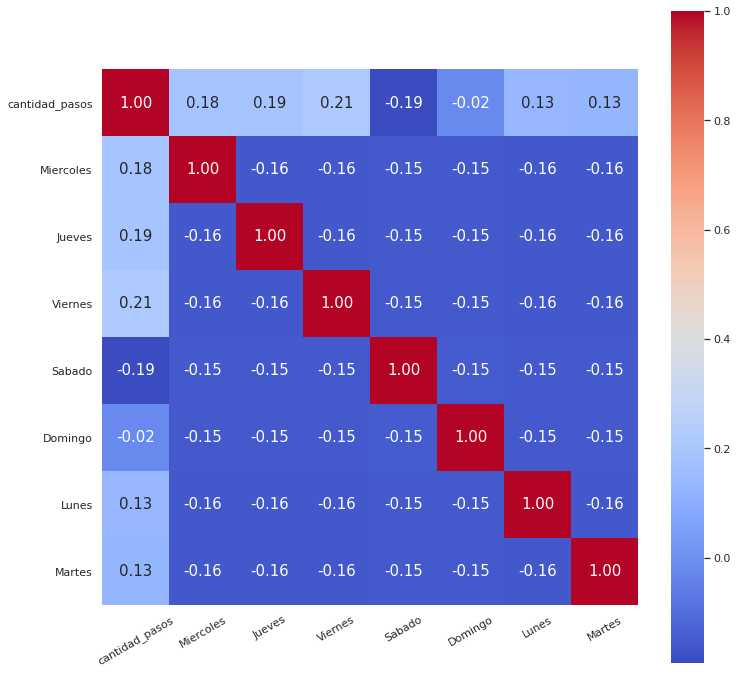

In [56]:
#Chequeo de correlaciones
corr = diario.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},   #annot_kws(tamaño de adentro)
           cmap= 'coolwarm')
plt.xticks(rotation = 30)
plt.show()

# Analisis y exploracion de datos

In [57]:
import datetime

In [58]:
# Implementacion de rolling window
ventana = int(365*5/7)
diario_promedio_tendencia = diario.cantidad_pasos.rolling(window=ventana, center = True).mean()


In [59]:
diario['fecha_numeros']=diario.index.map(datetime.datetime.toordinal)
diario.head()

,cantidad_pasos,Miercoles,Jueves,Viernes,Sabado,Domingo,Lunes,Martes,fecha_numeros
fecha,,,,,,,,,
2014-01-01,6330.0,6330.0,0.0,0.0,0.0,0.0,0.0,0.0,735234
2014-01-02,5962.0,0.0,5962.0,0.0,0.0,0.0,0.0,0.0,735235
2014-01-03,6616.0,0.0,0.0,6616.0,0.0,0.0,0.0,0.0,735236
2014-01-04,31.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,735237
2014-01-05,21.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,735238


In [61]:
# Implementacion de una regresion lineal
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(diario.fecha_numeros.values.reshape(-1, 1), diario.cantidad_pasos)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

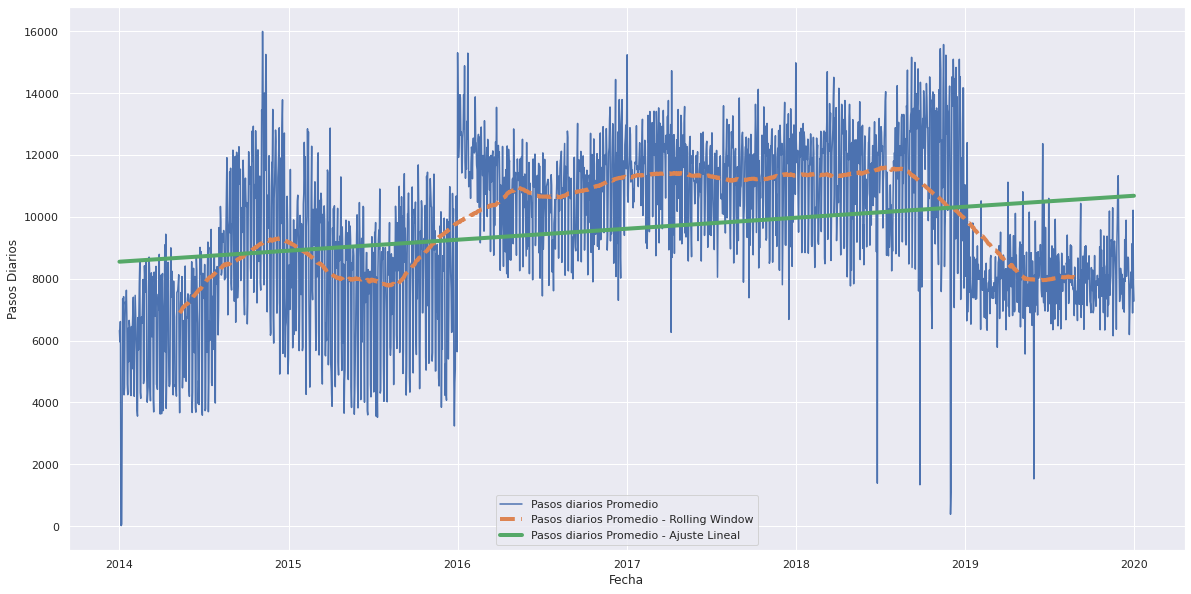

In [62]:
plt.figure(figsize = (20,10))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Pasos diarios Promedio')
plt.plot(diario_promedio_tendencia, ls = '--', lw = 4, label = 'Pasos diarios Promedio - Rolling Window')
plt.plot(diario.index, lr.predict(diario.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Pasos diarios Promedio - Ajuste Lineal')
plt.xlabel('Fecha')
plt.ylabel('Pasos Diarios')
plt.legend()
plt.show()



El siguiente grafico nos muestra la media movil y la tendencia lineal del trafico. Podemos ver que la tendencia tiene una pendiente positiva pero ha habido un gran declive del trafico en el año 2019. Si continua asi, la tendencia podria revertirse.

## Tendencia, Estacionalidad y Ruido

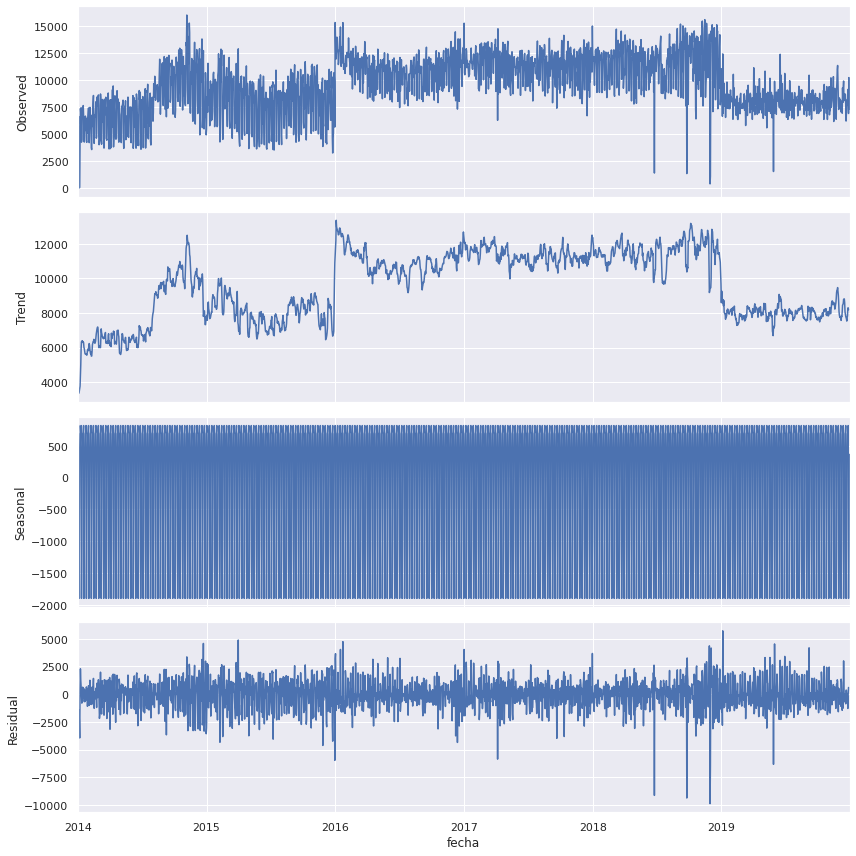

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(diario.cantidad_pasos, model='additive')
plt.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

#### En el siguiente grafico podemos ver como varia la tendencia, estacionalidad y el ruido a lo largo del tiempo. De la tendencia podemos remarcar el gran aumento que se produce en 2016 y su posterior declive en 2019. Por otro lado de la estacionalidad no se puede decir nada. Y del ruido podemos ver los picos que se tienen a comienzos de cada año.

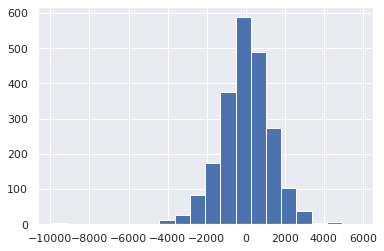

In [64]:

plt.figure(figsize = (6,4))
plt.hist(result.resid, bins = 20)
plt.show()

#### Histrograma del ruido.

## Autocorrelacion

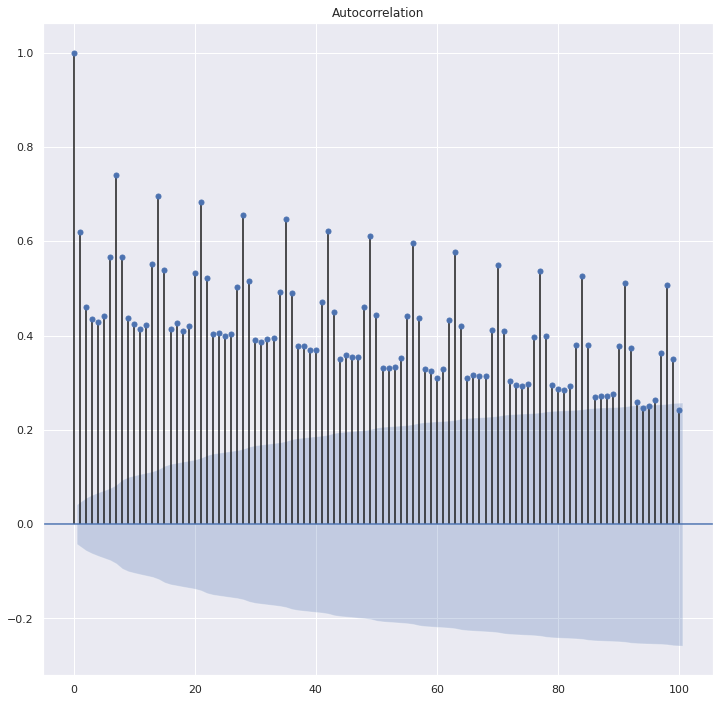

In [65]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diario.cantidad_pasos, lags = 100)
plt.show()

#### Graficamos la correlacion para poder definir el look_back que utilizaremos. Es decir cuanto tiempo utilizaremos para predecir el dato siguiente.

# Modelos

## Train-Test Split

In [66]:
look_back = 85 
N = diario.shape[0]
N 

2191

In [67]:
N = diario.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(2105, 85) (2105,)


In [68]:
for i in range(X.shape[0]):
    X[i,:] = diario.cantidad_pasos.iloc[i:i+look_back]
    y[i] = diario.cantidad_pasos.iloc[i+look_back]
    #X[i,:] = diario.iloc[i:i+look_back]
    #y[i] = diario.iloc[i+look_back]

In [69]:
N_train = 365*5 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 365 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(1740, 85) (1740,)
(365, 85) (365,)


#### Los modelos se van a entrenar con los años 2014 a 2018 para predecir el año 2019.

## One-Step Prediction

#### One step prediction va a ser nuestro modelo benchmark.

In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [71]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]


In [72]:
benchmark_mae = mean_absolute_error(y_test, y_test_pred_benchmark)
print('El error absoluto medio sobre el set de benchmark:',benchmark_mae)
print()

benchmark_test = np.sqrt(mean_squared_error(y_test, y_test_pred_benchmark))
print(f'El error cuadrático medio sobre el set de benchmark: {benchmark_test}')
print()

El error absoluto medio sobre el set de benchmark: 1134.813698630137

El error cuadrático medio sobre el set de benchmark: 1530.5926160034824



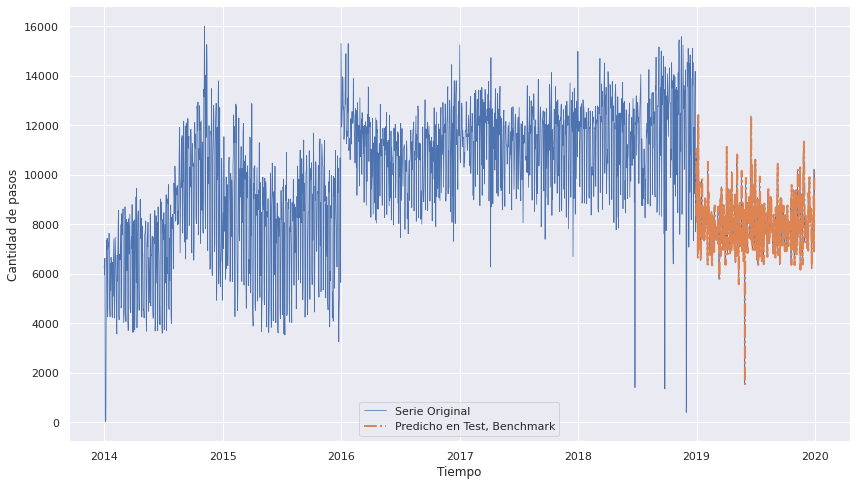

In [73]:
plt.figure(figsize=(14,8))
plt.plot(diario.cantidad_pasos.index[:length_total], diario.cantidad_pasos[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.cantidad_pasos.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

## Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor
#'warm_start': True, 'n_jobs': 6, 'n_estimators': 1000, 'max_features': 'sqrt', 'criterion': 'mae'
rf = RandomForestRegressor(n_estimators=100, random_state=42, warm_start= True).fit(X_train,y_train)

In [75]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [76]:
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print()

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'El error cuadrático medio sobre el set de entrenamiento: {rmse_train}')
print(f'El error cuadrático medio sobre el set de evaluacion: {rmse_test}')


El error absoluto medio sobre el set de entrenamiento: 386.352959770115
El error absoluto medio sobre el set de evaluacion: 887.7766849315068

El error cuadrático medio sobre el set de entrenamiento: 560.2252125253049
El error cuadrático medio sobre el set de evaluacion: 1236.516673504011


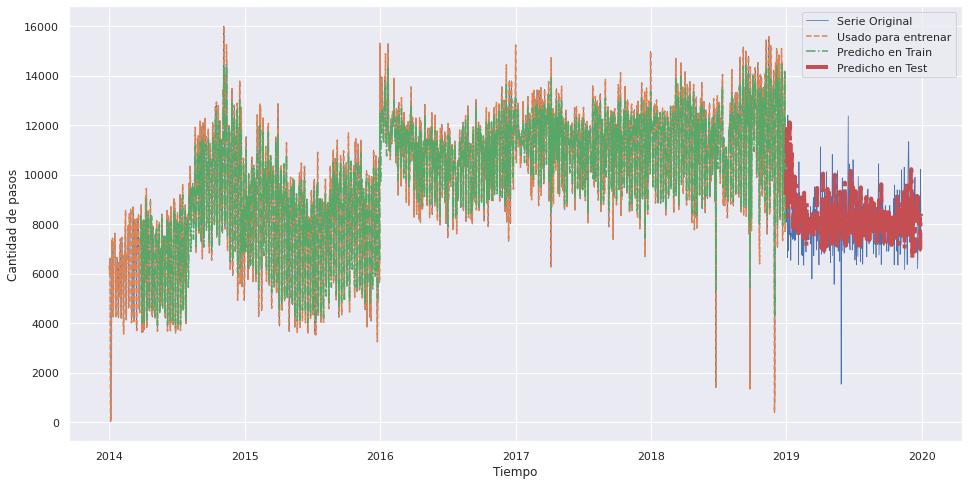

In [77]:
plt.figure(figsize=(16,8))
plt.plot(diario.cantidad_pasos.index[:length_total], diario.cantidad_pasos[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.cantidad_pasos.index[:N_train + look_back], diario.cantidad_pasos[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario.cantidad_pasos.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.cantidad_pasos.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

## Multi-Step Prediction

In [78]:
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

In [79]:
MAE = mean_absolute_error(y_test, y_ms_test_pred)
RMSE = mean_squared_error(y_test, y_ms_test_pred)
print('El error absoluto medio sobre el set de evaluacion:',(MAE))
print('El error cuadratico medio sobre el set de evaluacion:',np.sqrt(RMSE))

El error absoluto medio sobre el set de evaluacion: 1584.0675342465754
El error cuadratico medio sobre el set de evaluacion: 1908.8294839552098


## XGBOOST

In [80]:
import xgboost as xgb 

In [81]:
xgb = xgb.XGBRegressor()
xgb.fit(X_train, y_train)

[21:54:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [82]:
y_pred = xgb.predict(X)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

In [83]:
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print()

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'El error cuadrático medio sobre el set de entrenamiento: {rmse_train}')
print(f'El error cuadrático medio sobre el set de evaluacion: {rmse_test}')

El error absoluto medio sobre el set de entrenamiento: 759.911340472342
El error absoluto medio sobre el set de evaluacion: 931.8242321275685

El error cuadrático medio sobre el set de entrenamiento: 1013.6973500412439
El error cuadrático medio sobre el set de evaluacion: 1289.093371050111


## Optimizacion de hiperparametros

#### Como Random Forest es el mejor modelo sin optimizar los hiperparamtros, lo vamos a selecionar para optimizar.

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [85]:
parametros= { 'n_estimators':[100,500,800,1000],'max_features': ['auto', 'sqrt', 'log2'], 'criterion':['mse', 'mae'],'n_jobs':[3,4,5,6],'warm_start':[True] }

In [86]:
model = RandomizedSearchCV(rf,parametros,n_jobs=-1,cv=None)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [87]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')


Mejores parametros: {'warm_start': True, 'n_jobs': 5, 'n_estimators': 800, 'max_features': 'auto', 'criterion': 'mse'}
Mejor Score: 0.40585576017007413



In [88]:
scores = pd.DataFrame(model.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_warm_start,param_n_jobs,param_n_estimators,param_max_features,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,76.902823,5.162284,0.291021,0.058966,True,4,800,log2,mae,"{'warm_start': True, 'n_jobs': 4, 'n_estimator...",0.561383,0.482608,0.276601,0.319979,0.214072,0.370928,0.130263,9
1,9.039194,0.320647,0.223226,0.012954,True,3,500,sqrt,mse,"{'warm_start': True, 'n_jobs': 3, 'n_estimator...",0.588912,0.494838,0.291475,0.330645,0.241650,0.389504,0.130992,5
2,114.224735,6.238299,0.147133,0.013864,True,5,100,auto,mae,"{'warm_start': True, 'n_jobs': 5, 'n_estimator...",0.610326,0.565403,0.286798,0.302620,0.215462,0.396122,0.159920,3
3,87.284388,3.524235,0.247878,0.058653,True,5,800,auto,mse,"{'warm_start': True, 'n_jobs': 5, 'n_estimator...",0.611248,0.557374,0.301312,0.303253,0.256091,0.405856,0.147668,1
4,9.099472,0.682393,0.235692,0.047534,True,3,800,log2,mse,"{'warm_start': True, 'n_jobs': 3, 'n_estimator...",0.572471,0.482355,0.283611,0.322350,0.236286,0.379414,0.127113,6
5,9.249261,0.465212,0.120412,0.005082,True,4,100,log2,mae,"{'warm_start': True, 'n_jobs': 4, 'n_estimator...",0.560177,0.489341,0.260377,0.295354,0.214268,0.363904,0.135695,10
6,49.534689,2.581665,0.229676,0.009756,True,3,500,log2,mae,"{'warm_start': True, 'n_jobs': 3, 'n_estimator...",0.559646,0.485575,0.276588,0.318292,0.217875,0.371595,0.129501,8
7,6.031369,0.507383,0.227871,0.003027,True,3,500,log2,mse,"{'warm_start': True, 'n_jobs': 3, 'n_estimator...",0.574868,0.480994,0.283548,0.322720,0.231249,0.378676,0.128744,7
8,9.313379,0.974290,0.154790,0.023865,True,6,100,auto,mse,"{'warm_start': True, 'n_jobs': 6, 'n_estimator...",0.608395,0.549437,0.295859,0.284448,0.236414,0.394911,0.152701,4
9,49.753804,11.294542,0.236721,0.019942,True,4,500,auto,mse,"{'warm_start': True, 'n_jobs': 4, 'n_estimator...",0.609571,0.555705,0.300499,0.300659,0.251874,0.403662,0.148194,2


In [89]:
y_pred = model.predict(X)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [90]:
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print()

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'El error cuadrático medio sobre el set de entrenamiento: {rmse_train}')
print(f'El error cuadrático medio sobre el set de evaluacion: {rmse_test}')


El error absoluto medio sobre el set de entrenamiento: 378.02613362068973
El error absoluto medio sobre el set de evaluacion: 888.5800650684931

El error cuadrático medio sobre el set de entrenamiento: 541.8601191473427
El error cuadrático medio sobre el set de evaluacion: 1235.897356553791


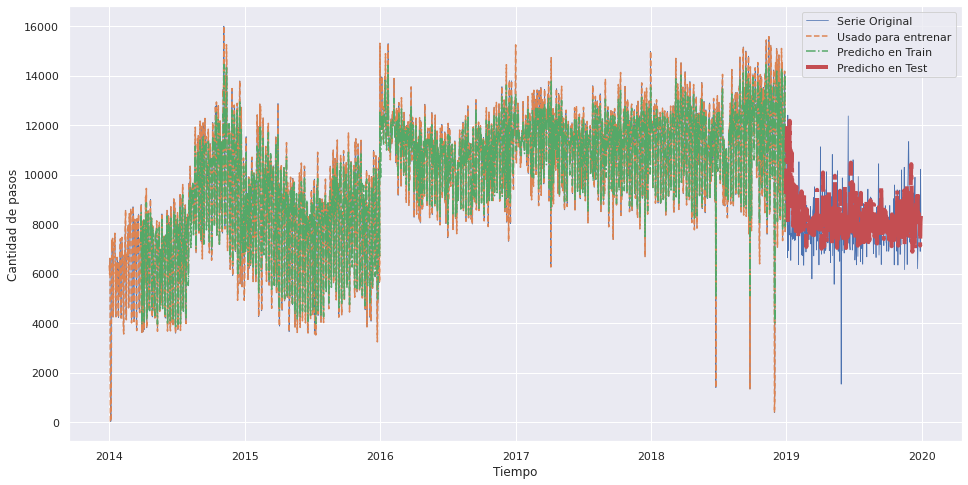

In [91]:
plt.figure(figsize=(16,8))
plt.plot(diario.cantidad_pasos.index[:length_total], diario.cantidad_pasos[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.cantidad_pasos.index[:N_train + look_back], diario.cantidad_pasos[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario.cantidad_pasos.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.cantidad_pasos.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


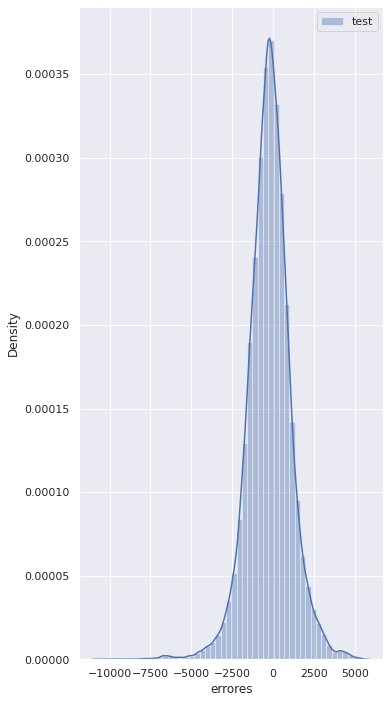

In [92]:
plt.subplot(1,2,1)
sns.distplot((y_test) -(y_test_pred).reshape(-1,1), bins = 50, label = 'test')
plt.xlabel('errores')
plt.legend()

## Prophet

#### Ahora se va a implementar Prophet, una libreria especializada en el estudio de Series de Tiempo.

In [93]:
from fbprophet import Prophet
from datetime import datetime
import holidays

In [94]:
m = Prophet(changepoint_range=0.95)
m.add_country_holidays(country_name='AR') #Agregamos los feriados 

In [95]:
#m = Prophet(seasonality_prior_scale=0.01,holidays_prior_scale=0.01,seasonality_mode='multiplicative',changepoint_range=0.70)

In [96]:

m.add_country_holidays(country_name='AR')
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)


In [97]:
diario.head()

,cantidad_pasos,Miercoles,Jueves,Viernes,Sabado,Domingo,Lunes,Martes,fecha_numeros
fecha,,,,,,,,,
2014-01-01,6330.0,6330.0,0.0,0.0,0.0,0.0,0.0,0.0,735234
2014-01-02,5962.0,0.0,5962.0,0.0,0.0,0.0,0.0,0.0,735235
2014-01-03,6616.0,0.0,0.0,6616.0,0.0,0.0,0.0,0.0,735236
2014-01-04,31.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,735237
2014-01-05,21.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,735238


In [98]:
#Dividimos en train-test 
split_date = '2019-01-01'
pjme_train = diario.loc[diario.index <= split_date].copy()
pjme_test = diario.loc[diario.index > split_date].copy()

In [99]:
#Renombramos las columnas fecha y cantidad_pasos en el train set que son las unicas que vamos a utilizar
pjme_train=pjme_train.reset_index().rename(columns={'fecha':'ds','cantidad_pasos':'y'})

In [100]:
pjme_train.head()

,ds,y,Miercoles,Jueves,Viernes,Sabado,Domingo,Lunes,Martes,fecha_numeros
0,2014-01-01,6330.0,6330.0,0.0,0.0,0.0,0.0,0.0,0.0,735234
1,2014-01-02,5962.0,0.0,5962.0,0.0,0.0,0.0,0.0,0.0,735235
2,2014-01-03,6616.0,0.0,0.0,6616.0,0.0,0.0,0.0,0.0,735236
3,2014-01-04,31.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,735237
4,2014-01-05,21.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,735238


In [101]:
pjme_train=pjme_train[['ds','y']]

In [102]:
# Con test renombramos solo fecha.
pjme_test=pjme_test.reset_index().rename(columns={'fecha':'ds',})

In [103]:
pjme_test.head()

,ds,cantidad_pasos,Miercoles,Jueves,Viernes,Sabado,Domingo,Lunes,Martes,fecha_numeros
0,2019-01-02,8378.0,8378.0,0.0,0.0,0.0,0.0,0.0,0.0,737061
1,2019-01-03,9985.0,0.0,9985.0,0.0,0.0,0.0,0.0,0.0,737062
2,2019-01-04,6638.0,0.0,0.0,6638.0,0.0,0.0,0.0,0.0,737063
3,2019-01-05,12399.0,0.0,0.0,0.0,12399.0,0.0,0.0,0.0,737064
4,2019-01-06,6922.0,0.0,0.0,0.0,0.0,6922.0,0.0,0.0,737065


In [104]:
# Utilizamos solo ds y cantidad de pasos
pjme_test=pjme_test[['ds','cantidad_pasos']]

In [105]:
m.fit(pjme_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [106]:
pjme_test_fcst = m.predict(pjme_test)

In [107]:
print('El error absoluto medio es:')
mean_absolute_error(y_true=pjme_test['cantidad_pasos'],
                   y_pred=pjme_test_fcst['yhat'])

El error absoluto medio es:


3848.680426876968

In [108]:
print('El error cuadratico medio es:')
np.sqrt(mean_squared_error(y_true=pjme_test['cantidad_pasos'],
                   y_pred=pjme_test_fcst['yhat']))

El error cuadratico medio es:


4130.265653134256

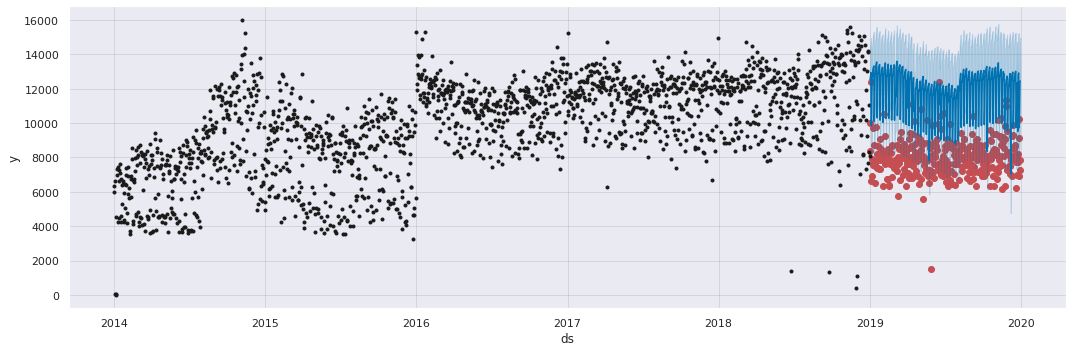

In [109]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.ds, pjme_test['cantidad_pasos'], color='r')
fig = m.plot(pjme_test_fcst, ax=ax)
plt.show()

#### Se observa la prediccion del modelo y los datos verdaderos. Podemos ver que tiene un error bastante grande.

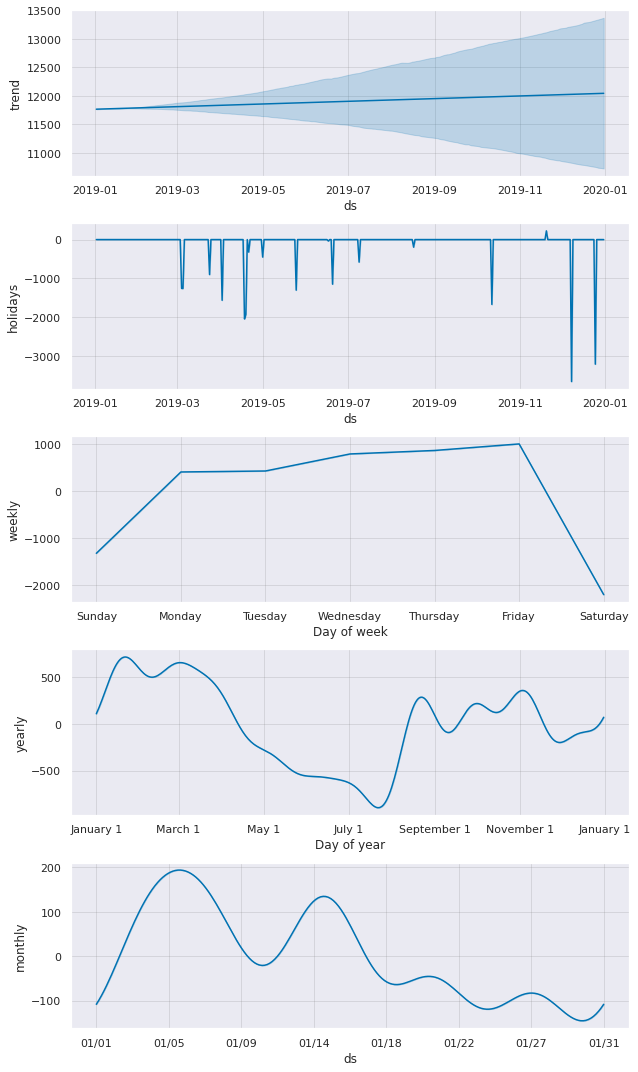

In [110]:
fig = m.plot_components(pjme_test_fcst)

#### Aca podemos observar la tendencia de los datos predichos por el modelo. Tambien se ve como los feriados, dias de la semana, meses y dias a lo largo del mes de enero afectan al trafico. Esta informacion es sumamente util, por ejemplo: se ve que el dia de mas trafico de la semana es el viernes, o que en el mes de Agosto hay un gran descenso.

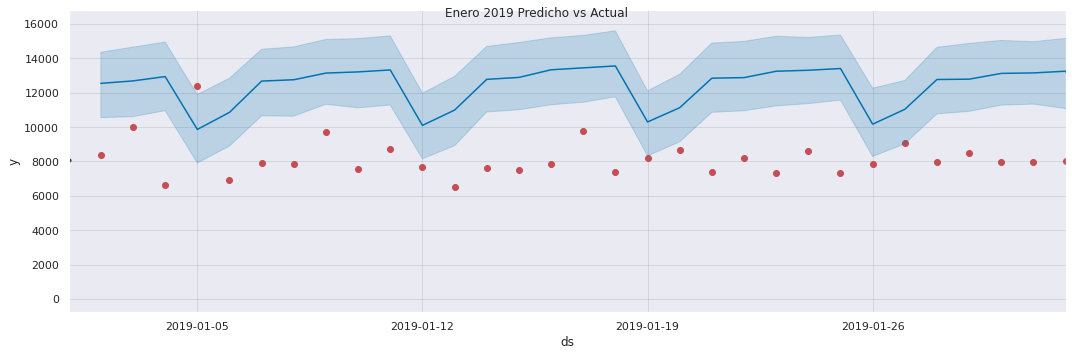

In [111]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.ds, pjme_test['cantidad_pasos'], color='r')
fig = m.plot(pjme_test_fcst, ax=ax)
ax.set_xbound(lower=datetime.strptime('01-01-2019','%m-%d-%Y'),
              upper=datetime.strptime('02-01-2019','%m-%d-%Y'))
plot = plt.suptitle('Enero 2019 Predicho vs Actual')

In [112]:
future = m.make_future_dataframe(periods=365)

In [113]:
forecast = m.predict(future)

#### El siguiente grafico muestra los puntos de cambio de tendencias a lo largo de los años. Si bien esta equivocado para el año 2019 ya que no pudo predecirlo correctamente, sirve mucho para estudiar los años anteriores.

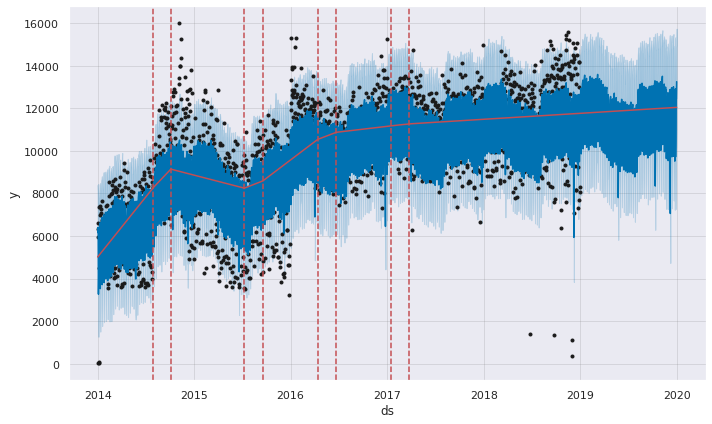

In [114]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


#### Como podemos ver los resultados de la prediccion son muy malos comparados con Random Forest. Pero lo que nos entrega Prophet es que se aplica mas facilmente al dataset ya que la division del train-test split es mucho mas simple, no hace falta implementar la autocorrelacion para definir el look back. Ademas nos ayuda a interpretar mas facilmente la serie porque nos brinda un monton de graficos utiles como los que podemos ver arriba.

# Prediccion del 2020

#### Vamos a utilizar prophet para predecir los datos del 2020 para ver si es capaz de evaluarlos correctamente.

## Cargamos el dataset

In [115]:
import datetime

In [116]:
link= 'https://drive.google.com/file/id=1fKP9N7VLxoMsn-AxLHIKdkLGgEviRqzg' 


In [117]:
fluff, id = link.split('=')
print (id) 

1fKP9N7VLxoMsn-AxLHIKdkLGgEviRqzg


In [118]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('flujo-vehicular-2020.csv')  
data_2020 = pd.read_csv('flujo-vehicular-2020.csv')

INFO:googleapiclient.discovery:URL being requested: GET https://www.googleapis.com/drive/v2/files/1fKP9N7VLxoMsn-AxLHIKdkLGgEviRqzg?alt=json


In [119]:
data_2020.info()
data_2020.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB


,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [120]:
datos=data_2020

In [121]:
#Utilizamos solo la estacion Illia
mask = datos.estacion=='ILLIA'
datos = datos[mask]
datos.head()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
52,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ILLIA,Auto,Efectivo,Efectivo,Centro,326.0
53,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ILLIA,Auto,Efectivo,Efectivo,Provincia,319.0
54,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ILLIA,Auto,Exento,Exento - Reglamento,Centro,2.0
55,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ILLIA,Auto,Exento,Exento - Reglamento,Provincia,1.0
56,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ILLIA,Auto,Rec.Deuda,Paso en Infracción,Centro,4.0


In [122]:
datos.tipo_vehiculo.unique()

array(['Auto', 'Auto con trailer', 'Moto', 'N/D', 'Pago Doble Auto',
       'Pesados 2 Ejes', 'Pesados 3 Ejes', 'Pesados 4 Ejes',
       'Pesados 5 Ejes', 'Pesados 6 Ejes', 'Pago doble Moto',
       'Pago Doble Auto con trailer / Pesado 2 Ejes'], dtype=object)

In [123]:
tipo=(['Auto', 'Auto con trailer', 'Moto', 'N/D', 'Pago Doble Auto','Pago doble Moto'])

In [124]:
#Utilizamos solo el trafico liviano
datos=datos[datos.tipo_vehiculo.isin(tipo)]


In [125]:
datos.drop(columns = ['periodo','hora_inicio', 'estacion','observacion','dia_fecha','mes'], inplace = True)

datos.head()

,fecha,dia,hora_fin,tipo_vehiculo,forma_pago,sentido,cantidad_pasos
52,2020-01-01 00:00:00,Miércoles,1.0,Auto,Efectivo,Centro,326.0
53,2020-01-01 00:00:00,Miércoles,1.0,Auto,Efectivo,Provincia,319.0
54,2020-01-01 00:00:00,Miércoles,1.0,Auto,Exento,Centro,2.0
55,2020-01-01 00:00:00,Miércoles,1.0,Auto,Exento,Provincia,1.0
56,2020-01-01 00:00:00,Miércoles,1.0,Auto,Rec.Deuda,Centro,4.0


In [126]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
datos['fecha2'] = pd.to_datetime(datos.fecha) + pd.to_timedelta(datos.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
datos.drop(columns=['fecha','hora_fin','sentido'], inplace = True)

datos.head()

,dia,tipo_vehiculo,forma_pago,cantidad_pasos,fecha2
52,Miércoles,Auto,Efectivo,326.0,2020-01-01 01:00:00
53,Miércoles,Auto,Efectivo,319.0,2020-01-01 01:00:00
54,Miércoles,Auto,Exento,2.0,2020-01-01 01:00:00
55,Miércoles,Auto,Exento,1.0,2020-01-01 01:00:00
56,Miércoles,Auto,Rec.Deuda,4.0,2020-01-01 01:00:00


In [127]:
#Corregimos el nombre de fecha2 a fecha
datos.rename(columns = {'fecha2':'fecha'}, inplace = True) 
datos.head()

,dia,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
52,Miércoles,Auto,Efectivo,326.0,2020-01-01 01:00:00
53,Miércoles,Auto,Efectivo,319.0,2020-01-01 01:00:00
54,Miércoles,Auto,Exento,2.0,2020-01-01 01:00:00
55,Miércoles,Auto,Exento,1.0,2020-01-01 01:00:00
56,Miércoles,Auto,Rec.Deuda,4.0,2020-01-01 01:00:00


In [128]:
#Reordenamos el dataset por fecha
datos.sort_values('fecha', inplace = True)
datos.reset_index(drop=True, inplace = True)
datos

,dia,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,Miércoles,Auto,Efectivo,467.0,2020-01-01 00:00:00
1,Miércoles,N/D,Violación,10.0,2020-01-01 00:00:00
2,Miércoles,Moto,Tag,2.0,2020-01-01 00:00:00
3,Miércoles,Moto,Efectivo,6.0,2020-01-01 00:00:00
4,Miércoles,Moto,Efectivo,7.0,2020-01-01 00:00:00
...,...,...,...,...,...
208452,Jueves,Auto,Mercado Pago,4.0,2020-12-31 23:00:00
208453,Jueves,Auto,Mercado Pago,1.0,2020-12-31 23:00:00
208454,Jueves,Auto,Mercado Pago,3.0,2020-12-31 23:00:00
208455,Jueves,Moto,Tag,4.0,2020-12-31 23:00:00


In [129]:
diario_final = datos.resample('D', on = 'fecha').sum()
print(diario_final.shape)
diario_final.head()

(366, 1)


,cantidad_pasos
fecha,
2020-01-01,40735.0
2020-01-02,82306.0
2020-01-03,87217.0
2020-01-04,57067.0
2020-01-05,51464.0


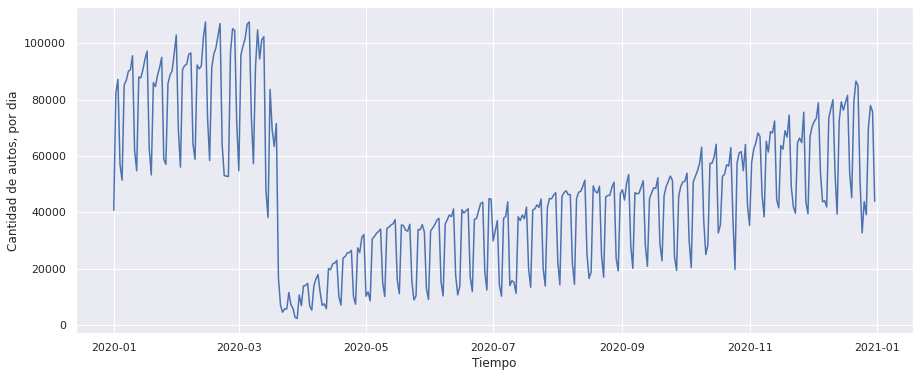

In [130]:
# Visualizacion de la cantidad de autos por dia
plt.figure(figsize = (15,6))
plt.plot(diario_final.index, diario_final.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

## Rolling Window y Tendencia Lineal

In [131]:
#Unimos todos los años
diario_completo=pd.concat([diario2,diario_final])

In [132]:
ventana = int(365*5/7)
diario_promedio_tendencia2 = diario_completo.cantidad_pasos.rolling(window=ventana, center = True).mean()

In [133]:
diario_completo['fecha_numeros']=diario_completo.index.map(datetime.datetime.toordinal)
diario_completo.head()

,cantidad_pasos,fecha_numeros
fecha,,
2014-01-01,10358.0,735234
2014-01-02,27353.0,735235
2014-01-03,56631.0,735236
2014-01-04,31.0,735237
2014-01-05,21.0,735238


In [134]:
lr = LinearRegression()
lr.fit(diario_completo.fecha_numeros.values.reshape(-1, 1), diario_completo.cantidad_pasos)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

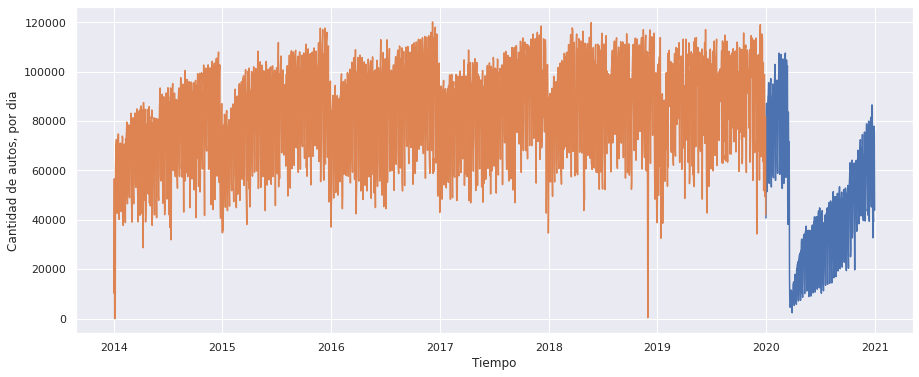

In [135]:
plt.figure(figsize = (15,6))
plt.plot(diario_final.index, diario_final.cantidad_pasos)
plt.plot(diario2.index, diario2.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()


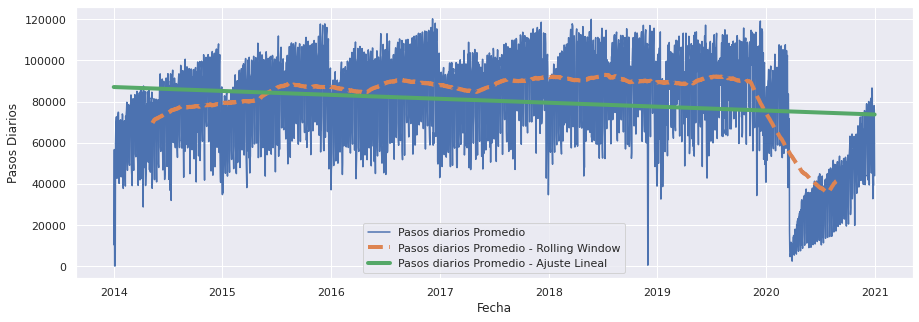

In [136]:
plt.figure(figsize = (15,5))
plt.plot(diario_completo.index, diario_completo.cantidad_pasos, label = 'Pasos diarios Promedio')
plt.plot(diario_promedio_tendencia2, ls = '--', lw = 4, label = 'Pasos diarios Promedio - Rolling Window')
plt.plot(diario_completo.index, lr.predict(diario_completo.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Pasos diarios Promedio - Ajuste Lineal')

plt.xlabel('Fecha')
plt.ylabel('Pasos Diarios')
plt.legend()
plt.show()

#### Podemos ver como el aislamiento influye sobre el trafico de la estacion. La pandemia provoco un descenso abrupto en el trafico que poco a poco a medida que la Ciudad de Buenos Aires fue avanzando de fases se fue recuperando. Se observa que la tendencia lineal tiene pendiente negativa.

In [137]:
final=datos

In [138]:
final.head()

,dia,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,Miércoles,Auto,Efectivo,467.0,2020-01-01
1,Miércoles,N/D,Violación,10.0,2020-01-01
2,Miércoles,Moto,Tag,2.0,2020-01-01
3,Miércoles,Moto,Efectivo,6.0,2020-01-01
4,Miércoles,Moto,Efectivo,7.0,2020-01-01


In [139]:
final.shape

(208457, 5)

## Limpieza de outliers y nulos

In [140]:
Q1 = final.cantidad_pasos.quantile(0.25)
Q3 = final.cantidad_pasos.quantile(0.75)
IQR = Q3 - Q1;
final=final[~((final.cantidad_pasos < (Q1 - 1.5 * IQR)) |(final.cantidad_pasos > (Q3 + 1.5 * IQR)))]
final.shape

(174650, 5)

In [141]:
final.isna().sum()

dia               0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
fecha             0
dtype: int64

## Reesampleo de los datos por dia

In [142]:
diario_final = final.resample('D', on = 'fecha').sum()
print(diario_final.shape)
diario_final.head()

(366, 1)


,cantidad_pasos
fecha,
2020-01-01,4486.0
2020-01-02,6936.0
2020-01-03,6627.0
2020-01-04,5507.0
2020-01-05,4666.0


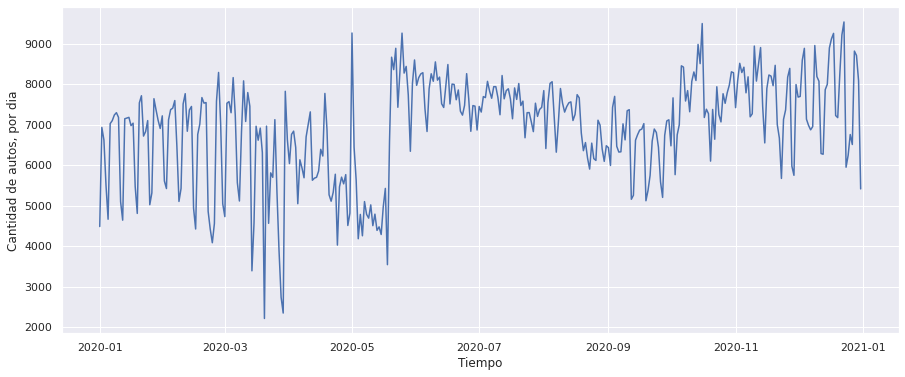

In [143]:
plt.figure(figsize = (15,6))
plt.plot(diario_final.index, diario_final.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

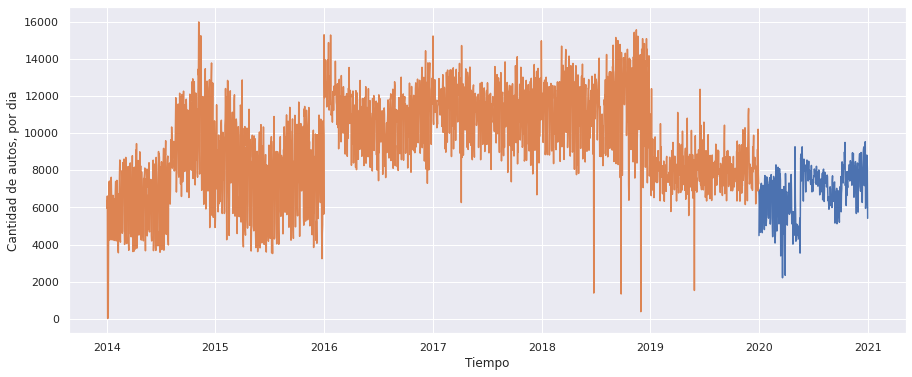

In [144]:
plt.figure(figsize = (15,6))
plt.plot(diario_final.index, diario_final.cantidad_pasos)
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

#### En el grafico podemos ver los datos que vamos a usar para entrenar el modelo y los que vamos a predecir.

## Train-test split

In [145]:
pjme_test_final=diario_final.reset_index().rename(columns={'fecha':'ds',})

In [146]:
pjme_test_final=pjme_test_final[['ds','cantidad_pasos']]

In [147]:
diario_train=diario.reset_index().rename(columns={'fecha':'ds','cantidad_pasos':'y'})

In [148]:
m = Prophet(changepoint_range=0.95)
m.add_country_holidays(country_name='AR')

In [149]:
m.fit(diario_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [150]:
pjme_test_final_fcst = m.predict(pjme_test_final)

In [151]:
print('El error absoluto medio es:')
mean_absolute_error(y_true=pjme_test_final['cantidad_pasos'],
                   y_pred=pjme_test_final_fcst['yhat'])

El error absoluto medio es:


1747.9867501935526

In [152]:
print('El error cuadratico medio es:')
np.sqrt(mean_squared_error(y_true=pjme_test_final['cantidad_pasos'],
                   y_pred=pjme_test_final_fcst['yhat']))

El error cuadratico medio es:


2127.2614209590665

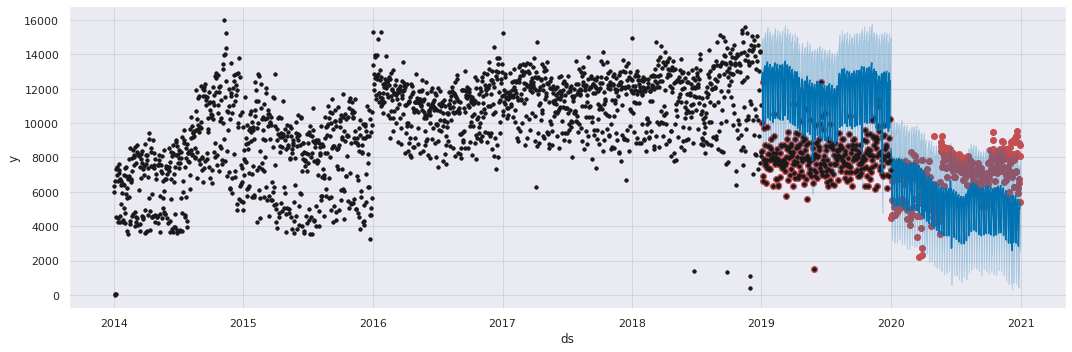

In [153]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test_final.ds, pjme_test_final['cantidad_pasos'], color='r')
fig = m.plot(pjme_test_final_fcst, ax=ax)
ax.scatter(pjme_test.ds, pjme_test['cantidad_pasos'], color='r')
fig = m.plot(pjme_test_fcst, ax=ax)
plt.show()

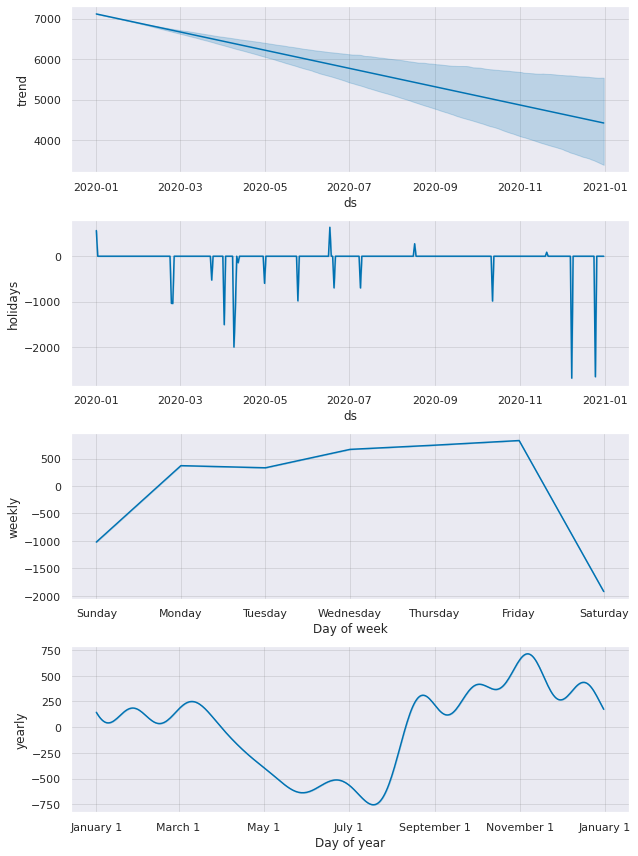

In [154]:
fig = m.plot_components(pjme_test_final_fcst)

#### Por ultimo si bien las predicciones no son tan buenas, Prophet es mucho mas preciso cuando quiere predecir el año 2020.

## Trafico 2021 predicho por Prophet

#### Por ultimo voy a utilizar una de las funciones de prophet para predecir el trafico de 2021, utilizando todos los años anteriores.

In [155]:
diario_2021=pd.concat([diario_final,diario_completo])

In [156]:
diario_2021.sort_values('fecha', inplace = True)



In [157]:
diario_2021=diario_2021.reset_index().rename(columns={'fecha':'ds','cantidad_pasos':'y'})

In [159]:
diario_2021.head()

,ds,y,fecha_numeros
0,2014-01-01,10358.0,735234.0
1,2014-01-02,27353.0,735235.0
2,2014-01-03,56631.0,735236.0
3,2014-01-04,31.0,735237.0
4,2014-01-05,21.0,735238.0


In [161]:
diario_2021.drop(['fecha_numeros'],axis=1)

,ds,y
0,2014-01-01,10358.0
1,2014-01-02,27353.0
2,2014-01-03,56631.0
3,2014-01-04,31.0
4,2014-01-05,21.0
...,...,...
2918,2020-12-29,77974.0
2919,2020-12-30,75712.0
2920,2020-12-30,8090.0
2921,2020-12-31,5416.0


In [162]:
m = Prophet(changepoint_range=0.95)
m.add_country_holidays(country_name='AR')

In [163]:
m.fit(diario_2021)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [164]:
future = m.make_future_dataframe(periods=365)

In [165]:
forecast = m.predict(future)

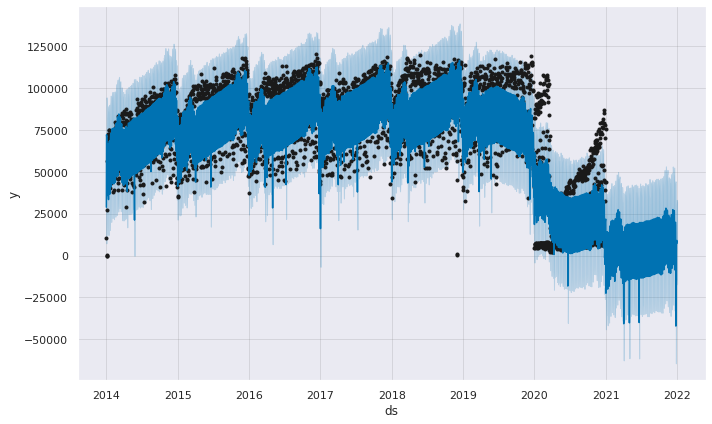

In [166]:
fig1 = m.plot(forecast)


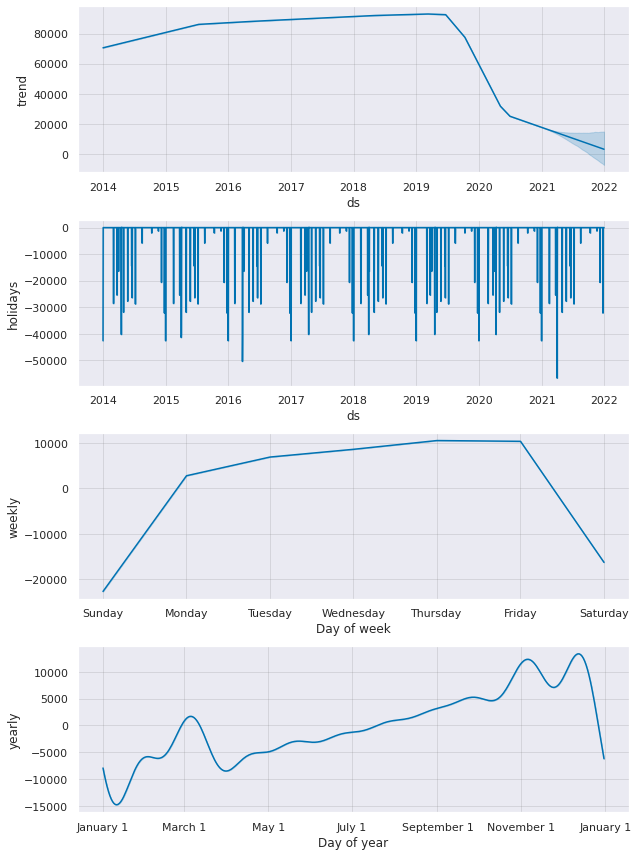

In [167]:
fig2 = m.plot_components(forecast)


In [168]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [169]:
plot_plotly(m, forecast)

#### En mi opinion el modelo esta bastante equivocado ya que esa prediccion es imposible (trafico negativo es imposible) pero esta implementacion es para mostrar todas las herramientas que tiene la libreria Prophet y lo utiles que pueden ser para el estudio de las Series de Tiempo.

# Conclusion

#### De acuerdo a todo el analisis y predicciones que hemos hecho podemos responder la pregunta que nos planteamos en el principio. Como evoluciona el trafico de la estacion Illia a lo largo del año y los años?.

#### El trafico a lo largo del año en la estacion tiene distintas fluctuaciones. A principios de cada año el trafico se desploma en Enero (posiblemente producido por la gente que se va de vacaciones) para luego ir aumentando progresivamente hasta llegar a un pico en Abril. Luego de esto se desploma hasta alcanzar su punto mas bajo en Junio (posiblemente producido por el receso de invierno), y por ultimo cierra el año con un fuerte aumento que alcanza el pico maximo en el mes de Noviembre. Esto cambia un poco año a año pero se puede ver que el patron es mas o menos el mismo.

####Con respecto al transcurso de año a año podemos ver que se produce un gran aumento con el cambio de año en 2016 para luego estabilizarse e ir aumentando progresivamente a lo largo de los años hasta 2019.|

#### Gracias al estudio que hemos hecho podemos ver dos puntos de inflexiones, uno en 2019 con la finalizacion de las obras que lleva a un descenso del trafico; otro en 2020 por la pandemia y el aislamiento que resultaron en un desplome del mismo. 2019 revirtio la tendencia en aumento que traian los años anteriores y prosiguio con un continuo descenso del trafico, podemos ver a principios de 2020 que esta tendencia continuaba que luego fue magnificada por la pandemia.

#### Es dificil realizar una prediccion para 2021 debido a la incetidumbre que dejo la pandemia pero yo creo que los niveles van a ser similares a los de 2020 que poco a poco va a ir aumentando hasta alcanzar unos niveles un poco menores a los de 2019, con las respectivas fluctuaciones que se producen en los distintos meses. Todo esto si no sucede otro severo aislamiento como el que se produjo Marzo del 2020. 


#Acceso a github:

https://github.com/francassone/Proyecto-4